In [1]:
library(maps)
library(ggmap)
library(mapproj)

Loading required package: ggplot2
Google Maps API Terms of Service: http://developers.google.com/maps/terms.
Please cite ggmap if you use it: see citation("ggmap") for details.


In [2]:
locations <- c()
chant_loc <- c('Ben', 'Rome1', 'Klo', 'Leipzig', 'Rou2', 'Amb1', 'Amb3', 'Amb2', 'NIt', 'Dij',
            'Ger2', 'Ger1', 'Moosburg', 'Gai', 'Arne', 'St. Yrieix', 'Paris', 'Sens', 'Aux',
            'Che', 'Rou1', 'Nev', 'Rome3', 'Rome2', 'MCa', 'Aqu', 'Ven', 'VimA', 'VimB',
            'VimC', 'VimD')

In [3]:
#Germanic dialect group
locations[["Aqu"]] <- "45.769725, 13.371192"
locations[["Ger1"]] <- "51.3, 6.85"
locations[["Ger2"]] <- "51.3, 6.85"
locations[["Klo"]] <- "48.304167, 16.316667"

In [4]:
#Central dialect group
locations[["Arne"]] <- "43.1864, 0.5061"
locations[["Aux"]] <- "47.7986, 3.5672"
locations[["Che"]] <- "48.8833, 2.6"
locations[["Dij"]] <- "47.2906, 5.0428"
locations[["Nev"]] <- "46.9933, 3.1572"
locations[["NIt"]] <- "45.466667, 9.183333"
locations[["Paris"]] <- "48.8567, 2.3508"
locations[["Rou1"]] <- "49.44, 1.1"
locations[["Rou2"]] <- "49.44, 1.1"
locations[["Sens"]] <- "48.1975, 3.2877"
locations[["Ven"]] <- "45.4375, 12.335833"

In [5]:
#Southwestern dialect group
locations[["Ben"]] <- "41.133333, 14.783333"
locations[["Gai"]] <- "43.9014, 1.8992"
locations[["MCa"]] <- "41.4916, 13.8159"
locations[["St. Yrieix"]] <- "45.5153, 1.2042"

In [6]:
#Roman Chant
locations[["Rome1"]] <- "41.887556, 12.475892"
locations[["Rome2"]] <- "41.885833, 12.505556"
locations[["Rome3"]] <- "41.902222, 12.453333"

In [7]:
#Ambrosian Chant
locations[["Amb1"]] <- "45.4631, 9.1854"
locations[["Amb2"]] <- "45.4631, 9.1854"
locations[["Amb3"]] <- "45.4631, 9.1854"
locations[["VimA"]] <- "45.616667, 9.366667"
locations[["VimB"]] <- "45.616667, 9.366667"
locations[["VimC"]] <- "45.616667, 9.366667"
locations[["VimD"]] <- "45.616667, 9.366667"

In [8]:
locations <- as.data.frame(locations)

In [9]:
coordinates <- data.frame(do.call('rbind', strsplit(as.character(locations$locations),', ',fixed=TRUE)))

In [10]:
options(digits=6)
df <- cbind(locations, coordinates)
df <- df[c("X1", "X2")]
colnames(df) <- c("latitude", "longitude")
df$longitude <- as.numeric(as.character(df$longitude))
df$latitude <- as.numeric(as.character(df$latitude))
df

,latitude,longitude
Aqu,45.7697,13.37119
Ger1,51.3000,6.85000
Ger2,51.3000,6.85000
Klo,48.3042,16.31667
Arne,43.1864,0.50610
Aux,47.7986,3.56720
Che,48.8833,2.60000
Dij,47.2906,5.04280
Nev,46.9933,3.15720
NIt,45.4667,9.18333


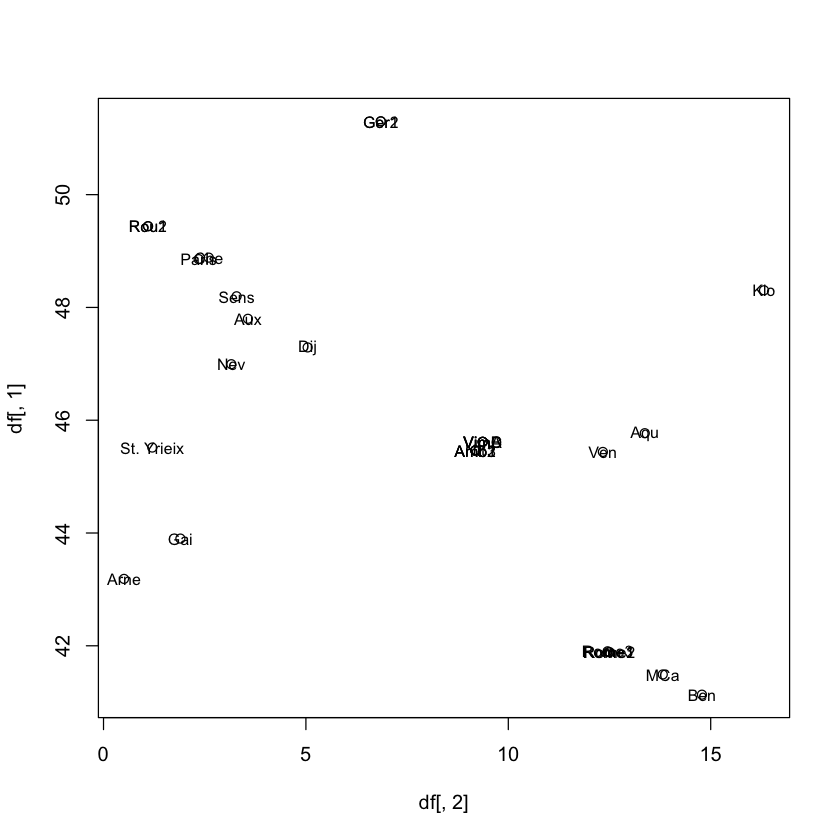

In [12]:
plot(x=df[,2], y=df[,1])
text(df[,2],  df[,1], labels=(rownames(df)), cex=0.8, xpd=TRUE)

Source : https://maps.googleapis.com/maps/api/staticmap?center=45,12&zoom=5&size=640x640&scale=2&maptype=terrain&language=en-EN


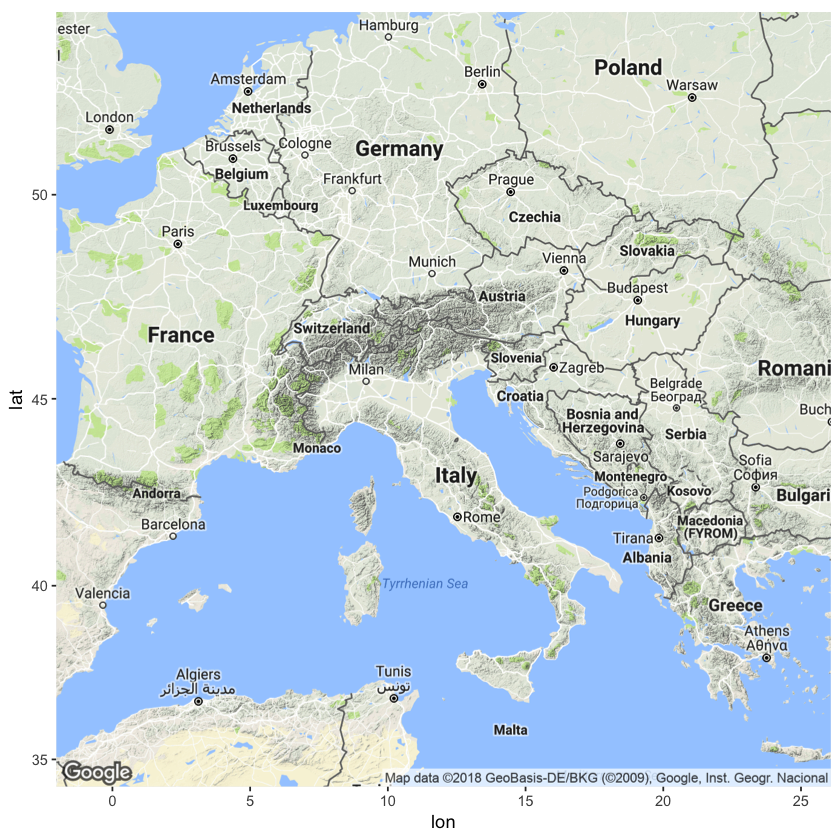

In [12]:
Map <- get_map(location = c(lon = 12, lat = 45), zoom = 5)
ggmap(Map)

In [16]:
pdf('wholemap.pdf')

ggmap(Map) +
    geom_point(data = df, aes(x = df[,2], y = df[,1], colour = "red")) + 
    geom_text(data = df, aes(x = df[,2], y = df[,1], label = rownames(df)), 
          size = 3, vjust = 0, hjust = 0, fontface = "italic" , colour = "red")
dev.off()

pdf 
  2